In [108]:
#起手式
import numpy as np
from scipy import stats #It's a way to import sub-modules
from scipy import special as scspec
from io import StringIO #StringIO behaves like a file object
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
c = StringIO("0 1\n2 3")
np.loadtxt(c)

array([[0., 1.],
       [2., 3.]])

In [13]:
d = StringIO("M 21 72 \nF 35 58")
np.loadtxt(d,dtype={'names':('gender','age','weight'),'formats':('S1','i4','f4')})

array([(b'M', 21, 72.), (b'F', 35, 58.)],
      dtype=[('gender', 'S1'), ('age', '<i4'), ('weight', '<f4')])

In [25]:
cc = StringIO("3 2 1 4 5 5 7 8")#重點是空格
np.loadtxt(cc)

array([3., 2., 1., 4., 5., 5., 7., 8.])

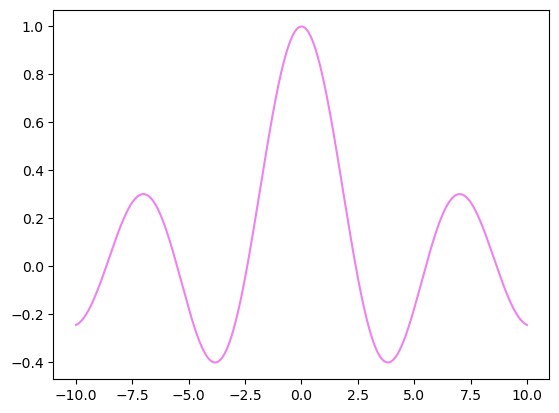

In [110]:
import numpy as np 
from scipy import special as scspec #本期特色
x = np.linspace(-10,10,5000)
y = scspec.jn(0,x)#這是貝塞爾函數，第一個"階數"，第二個是"範圍"。
plt.plot(x,y,'violet')#第三項參數是"顏色"

In [111]:
import numpy as np
from scipy.special import legendre#勒讓德多項式
#要從scipy.special引入東西時，還是要用原始名稱，即使已經命名為其他名字
x=np.linspace(0,1,20)
y=legendre(3)(x)
print(y)

[ 0.         -0.07858288 -0.15497886 -0.22700102 -0.29246246 -0.34917626
 -0.39495553 -0.42761335 -0.44496282 -0.44481703 -0.42498907 -0.38329203
 -0.317539   -0.22554308 -0.10511736  0.04592506  0.2297711   0.44860767
  0.70462166  1.        ]


In [112]:
import numpy as np
from scipy import linalg #linalg = linear algebra，線性代數
arr = np.array([[1,2],[3,4]])
print(linalg.det(arr))
brr = np.array([[3,2],[6,4]])
print(linalg.det(brr))
print(linalg.det(np.ones((4,4))))#一定要是正方形，不然會出錯

-2.0
6.661338147750939e-16
0.0


In [113]:
import numpy as np
arr = np.array([[1,2],[3,4]])
iarr = np.linalg.inv(arr)#找反矩陣
print(arr)
print(iarr)
np.allclose(np.dot(arr,iarr),np.eye(2))#這東西會回傳一個布林值，檢查兩個矩陣是否在一個誤差範圍內，或是否相等
#eye(大小)：單位矩陣

[[1 2]
 [3 4]]
[[-2.   1. ]
 [ 1.5 -0.5]]


True

In [114]:
import numpy as np
test1 = np.array([[1,2],[3,4]])
test2 = np.array([[5,1],[1,7]])
result = np.dot(test1,test2)#test1乘test2
print(result)

[[ 7 15]
 [19 31]]


In [115]:
import numpy as np
print(np.arange(9).reshape((3,3)))
#reshape(列,行)，直行橫列
#arange(n) = 0~n-1
arr = np.arange(9).reshape((3,3)) + np.diag([1,0,1])
print(arr)
brr = np.diag([8,6,3])
print(brr)
#diag是從左上寫到右下的矩陣，有N個元素就是 N*N 矩陣。

uarr,spec,vharr = np.linalg.svd(arr)
print(uarr)#左奇異向量組成的單位矩陣。
print(spec)#奇異值組成的一維陣列。
print(vharr)#右奇異向量的共軛轉置矩陣。

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[[1 1 2]
 [3 4 5]
 [6 7 9]]
[[8 0 0]
 [0 6 0]
 [0 0 3]]
[[-0.1617463  -0.98659196  0.02178164]
 [-0.47456365  0.09711667  0.87484724]
 [-0.86523261  0.13116653 -0.48390895]]
[14.88982544  0.45294236  0.29654967]
[[-0.45513179 -0.54511245 -0.70406496]
 [ 0.20258033  0.70658087 -0.67801525]
 [-0.86707339  0.45121601  0.21115836]]


In [119]:
import numpy as np
sarr = np.diag(spec)#把上面的一維陣列弄成3*3
svd_mat = uarr.dot(sarr).dot(vharr)#第一個東西.dot(第二個被乘的東西)
print(svd_mat - arr)
np.allclose(svd_mat,arr)

[[ 6.66133815e-16 -2.10942375e-15 -8.88178420e-16]
 [ 4.44089210e-16 -8.88178420e-16  0.00000000e+00]
 [ 8.88178420e-16 -8.88178420e-16  0.00000000e+00]]


True

In [5]:
import numpy as np
arr = np.array([[0,1,2],[1,4,5],[2,5,8]])
print(arr)
eig_val,Mat_S = np.linalg.eig(arr)#這東西會回傳兩種參數，其中Mat_S是指 "特徵向量矩陣"
print(eig_val)
print(Mat_S)
print(Mat_S.T - np.linalg.inv(Mat_S))
np.allclose(Mat_S.T.dot(Mat_S), np.eye(3))

[[0 1 2]
 [1 4 5]
 [2 5 8]]
[11.80181602 -0.49145869  0.68964268]
[[ 0.18471811  0.95127125  0.24690531]
 [ 0.54696579  0.10921897 -0.82999978]
 [ 0.81652167 -0.28836475  0.50013811]]
[[ 0.00000000e+00 -5.55111512e-16  5.55111512e-16]
 [ 6.66133815e-16 -5.41233725e-16 -5.55111512e-17]
 [ 7.49400542e-16  2.22044605e-16  5.55111512e-16]]


True

In [6]:
import numpy as np
test1 = np.array([[1,1],[2,2]])
print(test1)
print(test1.T)
#矩陣.T：轉置，行列互換

[[1 1]
 [2 2]]
[[1 2]
 [1 2]]


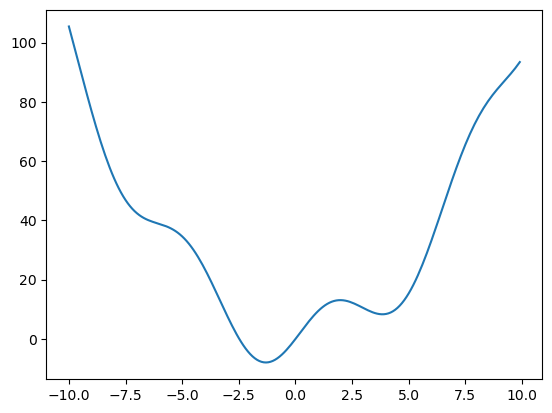

In [12]:
#重頭戲開始，開始有方程式加入囉。
%matplotlib inline 
#the魔法指令
import numpy as np
import matplotlib.pyplot as plt
def myfunction(x):
        return x**2 + 10*np.sin(x)
x = np.arange(-10,10,0.1)
plt.plot(x,myfunction(x))
plt.show()

In [2]:
from scipy import optimize
optimize.fmin_bfgs(myfunction,0)
#這段程式碼的目的是找到 myfunction 的最小值，並且從初始猜測值 0
#fmin是指“function minimization”
#bfgs是指"Broyden-Fletcher-Goldfarb-Shanno"

Optimization terminated successfully.
         Current function value: -7.945823
         Iterations: 5
         Function evaluations: 12
         Gradient evaluations: 6


array([-1.30644012])

In [117]:
from scipy import optimize
optimize.fmin_bfgs(myfunction,0,disp=False)#第三個參數是布林值，決定是否印出詳細資訊，disp=display

array([-1.30644012])

In [118]:
from scipy import optimize
xmin_local = optimize.fminbound(myfunction,0,10)
#在一個區間內找到一個函數的最小值
print(xmin_local)

3.8374671194983834


In [13]:
#本期重點：擬合函數
import numpy as np
from scipy import optimize
xdata = np.linspace(-10,10,num=20)
ydata = myfunction(xdata) + np.random.randn(xdata.size)#常態分佈的隨機數
def f2(x,a,b):
    return a*x**2 + b*np.sin(x)
guess = [2,2]#分別代表了a和b
params, params_covariance = optimize.curve_fit(f2,xdata,ydata,guess)
#名詞解釋：
#params：最佳擬合參數
#params_covariance：擬合參數的協方差矩陣，表示參數的不確定性
#covariance：共變異數
print(params)#印出最適合的a和b
print(params_covariance)

[ 0.99934347 10.59714527]
[[ 2.20570129e-05 -4.25820364e-12]
 [-4.25820364e-12  1.12650022e-01]]


In [176]:
from scipy import optimize
root = optimize.fsolve(myfunction,1)
#fsolve會找函數值=0時的x值
#fsolve(目標函數,從甚麼值開始找)
print(root)
root2 = optimize.fsolve(myfunction,-2.5)
print(root2)

[0.]
[-2.47948183]


In [123]:
#本期重點：開始解方程式囉
from scipy.optimize import fsolve #重點一：scipy.optimize的fsolve
import math
def equations(p):
    (x,y) = p
    return (x+y**2-4, math.exp(x)+ x*y -3)
x,y = fsolve(equations,(1,1))
print(x,y)
print(equations((x,y)))

0.6203445234801195 1.8383839306750887
(4.4508396968012676e-11, -1.0512035686360832e-11)


In [208]:
from scipy.optimize import fsolve
import numpy as np
from numpy import exp #如果沒有這命令，exp要用到np.exp，所以這是簡化用的命令
def f(variables):
    (x,y) = variables
    first_eq = x+y**2 - 4
    second_eq = exp(x) + x*y - 3
    return [first_eq,second_eq]
solution = fsolve(f,(0.1,1))

print(solution)#x,y的值，對應到上面
print(f(solution))#x,y帶入f的值，也對應到上面

[0.62034452 1.83838393]
[2.440714297335944e-12, -1.3882228699912957e-12]


In [124]:
import numpy as np
from scipy.optimize import fsolve
def myFunction(z):
    x,y,w = z[0],z[1],z[2]
    F = np.empty((3))#創建一個空矩陣，元素會是隨機的，因為未經初始化
    F[0]=x**2+y**2-20
    F[1]=y-x**2
    F[2]=w+5-x*y
    return F
zGuess = np.array([1,1,1])
z=fsolve(myFunction,zGuess)#解們，解是說'x,y,w'
print(z)
print(myFunction(z))#這才會拿到回傳的'F'

[2. 4. 3.]
[-4.46718218e-11  1.33528744e-11  1.38173917e-11]


In [245]:
import numpy as np
from scipy.integrate import quad#本期重點：開始算定積分囉
res,err = quad(np.sin,0,np.pi/2)
#quad(函數,下限,上限)
#sin(x)從0到π/2的積分(答案是'1')
#quad函數返回兩個值：積分結果res、估計的誤差err。
#quad stands for quadrature，意思是"正交"或"求積"
print(res,err)
print(np.allclose(res,1))
np.allclose(err,1-res)

0.9999999999999999 1.1102230246251564e-14
True


True

In [249]:
test = lambda x,y: x+y
print(test(1,2))
#lambda概念

3


In [2]:
from scipy import integrate
f = lambda y, x:x*y**2
integrate.dblquad(f,0,2,lambda x: 0,lambda x:x)
#dblquad(要積的函數,外部積分下限,外部積分上限,內部積分下限,內部積分上限)
#dblquad(函數,常數,常數,函數,函數)
#可以透過lambda x: a的方式用函數表達常數
#只有最外層的函數上下限可以直接帶常數

(2.1333333333333337, 5.869927213748517e-14)

In [3]:
from scipy import integrate
f = lambda z,y,x:x*y**2*z**3
integrate.tplquad(f,0,2,lambda x:0,lambda x:x, lambda x,y:0 , lambda x,y:x*y+x)
#順序：最外層對x積分，中間層是y，最內層是z
#最內層的積分可能會依賴外層的變數，這就是為何最內部需要給x,y的原因

(165.58966958966963, 2.7894420565568574e-11)

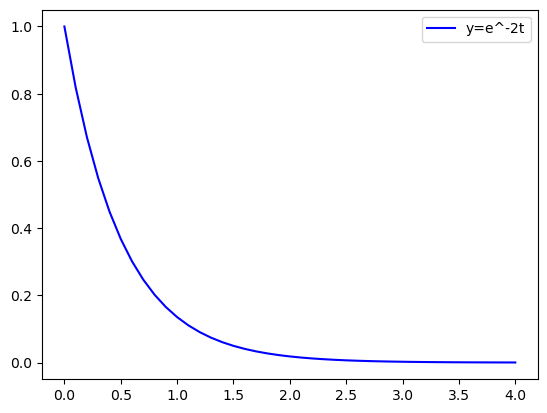

In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

def derivative(y,t,p):
    b=p
    return b*y#這就是dydt
    
t = np.linspace(0,4,41)
p=[-2]
y0=[1]
#這中括號其實可有可無，但就為了...一致性，M3。
sol = odeint(derivative,y0,t,args=(p,))
#odeint(函數,數組或列表,數組或列表,元組)
#如果元組中只有一個元素，則需要在元素後面加上逗號：
plt.plot(t,sol,color='blue',alpha=1,label='y=e^-2t')
plt.legend(loc='upper right')
#這是透過dydt的結果，再根據初始條件，找到原始函數的方式
#原始函數：y=e^-2t

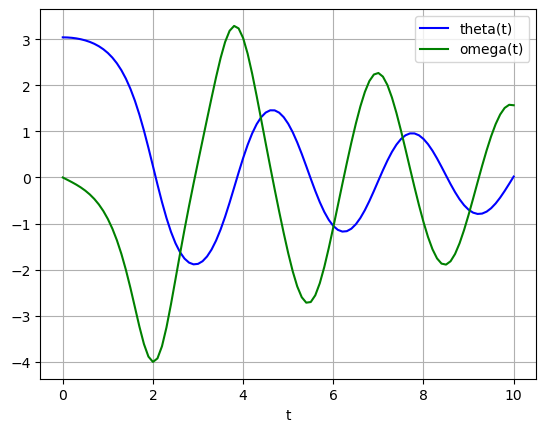

In [86]:
#這裡再計算阻尼隨時間的變化
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

def pend(y,t,b,c):
    theta,omega = y
    #第一個是dθ/dt；第二個是dω/dt
    dydt = [omega,-b*omega - c*np.sin(theta)]
    #意思是dθ/dt對應到第一個元素；dω/dt對應到第二個元素
    return dydt

b,c = 0.25,5.0
#b是0.25；c是5.0
y0 = [np.pi-0.1,0.0]
t = np.linspace(0,10,101)#0到10切成101份

sol = odeint(pend,y0,t,args=(b,c))
#sol會回傳101列2行的資料
plt.plot(t,sol[:,0],'b',label='theta(t)')
plt.plot(t,sol[:,1],'g',label='omega(t)')
#先列再行，[:,n]，意味者"全部的列，第n行的資料"
plt.legend(loc='best')
plt.xlabel('t')
plt.grid()
plt.show()

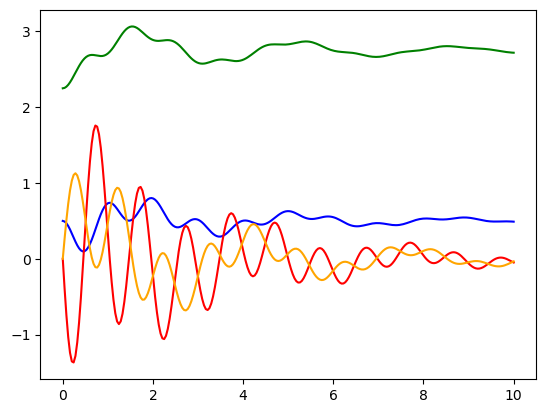

In [102]:
#兩個彈簧耦合的狀況...
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

def vectorfield(w,t,p):
    #p = [m1,m2,k1,k2,L1,L2,b1,b2]#hmm?
    x1,y1,x2,y2 = w
    m1,m2,k1,k2,L1,L2,b1,b2 = p
    f = [y1,(-b1 * y1-k1 * (x1-L1) + k2 * (x2-x1-L2))/m1,y2,(-b2 * y2-k2 * (x2-x1-L2))/m2]
    return f

m1,m2 = 1.0,1.5
b1,b2 = 0.8,0.5
x1,x2 = 0.5,2.25
y1,y2 = 0.0,0.0

#自定義內容
k1,k2 = 10.0,20.0
L1,L2 = 0.5,2.25

#一些微分方程的參數們
abserr = 1.0e-8
relerr = 1.0e-6
stoptime = 10.0
numpoints = 250

t = [stoptime*float(i)/(numpoints-1) for i in range(numpoints)] #i = 1到250，10*i/249
p = [m1,m2,k1,k2,L1,L2,b1,b2]
w0 = [x1,y1,x2,y2]
wsol = odeint(vectorfield,w0,t,args=(p,),atol=abserr,rtol=relerr)

plt.plot(t,wsol.T[0],color='blue',alpha=1)
plt.plot(t,wsol.T[1],color='red',alpha=1)
plt.plot(t,wsol.T[2],color='green',alpha=1)
plt.plot(t,wsol.T[3],color='orange',alpha=1)
plt.show()

In [ ]:
#結束囉